In [33]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

ImportError: cannot import name 'helper' from 'torch' (c:\Users\layf1\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py)

In [2]:
# Define transformations
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Downloading the Data

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

0.7%

100.0%


Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw


100.0%
2.0%


Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw



100.0%
100.0%


Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw

Extracting PATH_TO_STORE_TRAINSET\MNIST\raw\t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET\MNIST\raw



8.9%

100.0%


Extracting PATH_TO_STORE_TESTSET\MNIST\raw\train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw


100.0%
2.0%


Extracting PATH_TO_STORE_TESTSET\MNIST\raw\train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw



100.0%
100.0%

Extracting PATH_TO_STORE_TESTSET\MNIST\raw\t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw

Extracting PATH_TO_STORE_TESTSET\MNIST\raw\t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET\MNIST\raw



# Explore the Data

In [8]:
# Shape
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


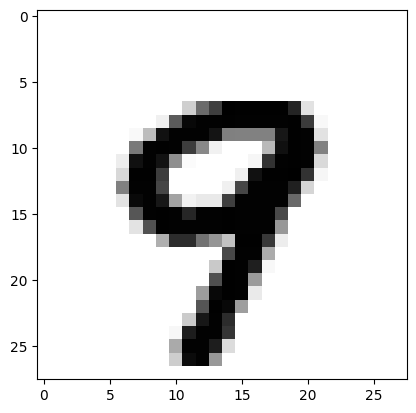

In [12]:
# Data val
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

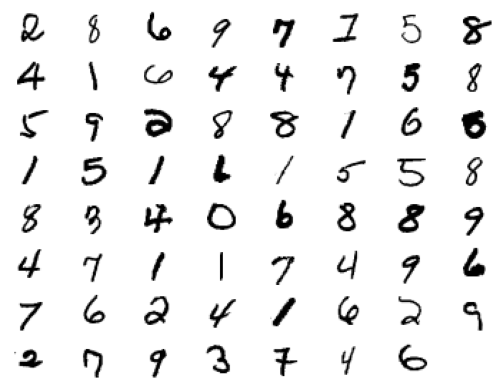

In [22]:
# Display 63 images
figure = plt.figure()
num_of_images = 63
for index in range(1, num_of_images + 1):
    plt.subplot(8, 8, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [23]:
# nn model
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [29]:
# Calaculate our loss
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) 
loss = criterion(logps, labels) 

# Train the Data

In [31]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.612772343509487
Epoch 1 - Training loss: 0.2838863053682771
Epoch 2 - Training loss: 0.22174112567864757
Epoch 3 - Training loss: 0.18024158448989647
Epoch 4 - Training loss: 0.14962131832676656
Epoch 5 - Training loss: 0.13002629409919478
Epoch 6 - Training loss: 0.11400543564338801
Epoch 7 - Training loss: 0.10136806461086342
Epoch 8 - Training loss: 0.09135016068560022
Epoch 9 - Training loss: 0.0834637615379931
Epoch 10 - Training loss: 0.07637878487319517
Epoch 11 - Training loss: 0.07069749856339906
Epoch 12 - Training loss: 0.06436389281716286
Epoch 13 - Training loss: 0.05912965987183487
Epoch 14 - Training loss: 0.055620323720404

Training Time (in minutes) = 2.8438973903656004


# Testing

Predicted Digit = 6


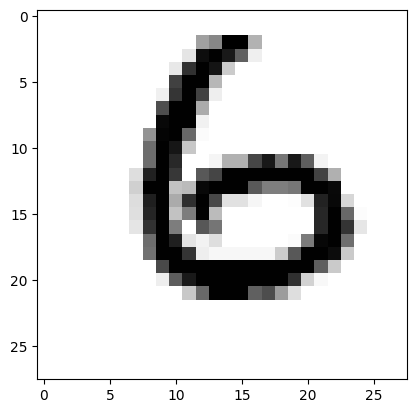

In [50]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

In [51]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9735
